<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_kmeans/Clustering_mpg_Ton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns 
mpg = sns.load_dataset("mpg")
mpg=mpg.drop('cylinders',1)
mpg=mpg.drop('model_year',1)
mpg_nonans = mpg.dropna() # remove observations with NaNs
mpg_num = mpg_nonans.select_dtypes(include='number') # keep only numeric variables 

print('datos originales = {}'.format(mpg.shape))
print('datos originales sin nans = {}'.format(mpg_nonans.shape))
print('datos nonans numericos  = {}'.format(mpg_num.shape))

datos originales = (398, 7)
datos originales sin nans = (392, 7)
datos nonans numericos  = (392, 5)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mpg_num.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [4]:
mpg_nonans.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin',
       'name'],
      dtype='object')

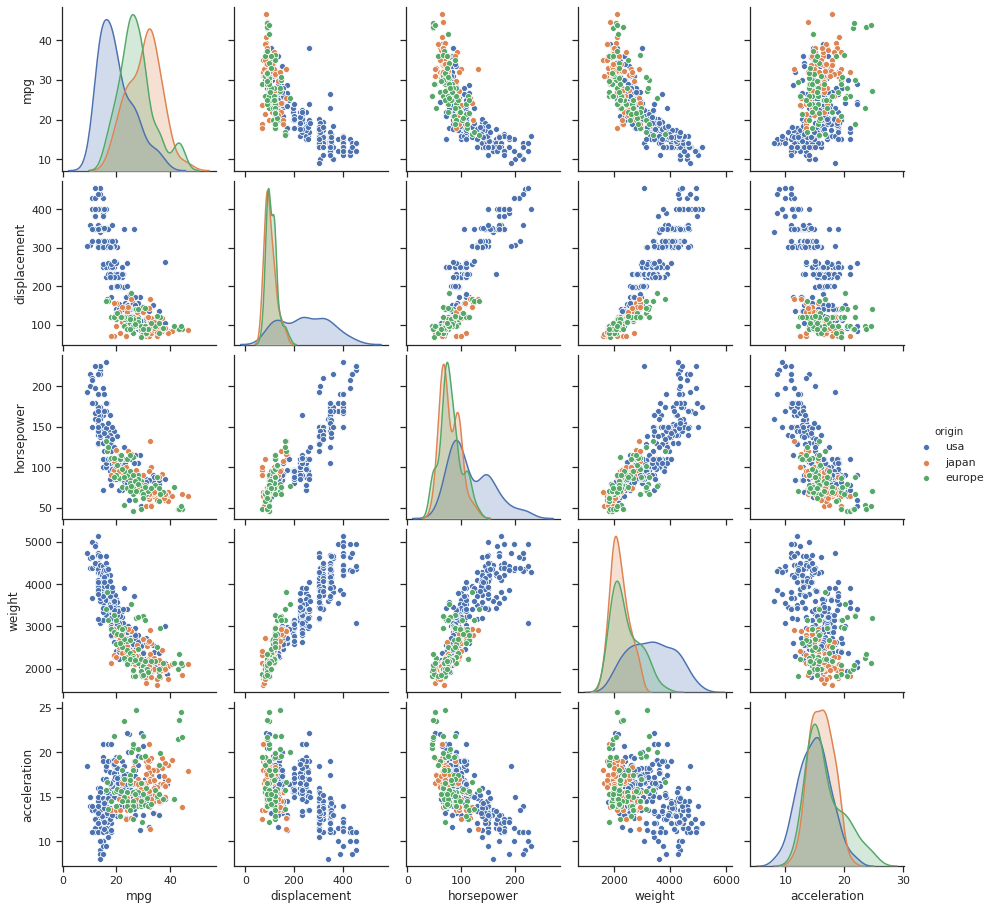

In [5]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(mpg_nonans,hue='origin')

In [6]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=3).fit_predict(mpg_num)
print(group)

[1 0 1 1 1 0 0 0 0 0 1 1 0 1 2 1 1 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 1 1 1 1
 0 0 0 0 0 0 0 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 0 0 0 2 0 0 0
 0 1 2 1 2 2 2 2 2 2 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 2 2 2 2
 2 2 2 0 0 2 2 2 1 1 2 1 1 1 1 1 2 2 2 2 0 1 1 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 2 2 1 2 1 2 2 1 2 1 2 1 1 2 2 2 2 2 2 2
 0 0 0 0 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2 1 0 1 1 0 0 0 0 0 2 2 2 2 2 0 0 0
 0 1 1 1 1 0 0 0 0 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 2 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 2 2 2 2 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 0 0 0 0 0 0 1 0 2 2 2 2 1
 0 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 1 2 2 2 1 1 2 2 2 1 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 1 1 2 2 2 2 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 1 1 2 2 2 1]


In [7]:
group.shape

(392,)

In [8]:
mpg_num.shape

(392, 5)

In [9]:
import numpy as np
mpg_num.loc[:,'kmeans'] = group

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
kmeans_result = KMeans(n_clusters=3).fit(mpg_num)
print('Etiquetas de asignacion a clusters {}'.format(kmeans_result.labels_))
print('Posición de los centroides de los clusters {}'.format(kmeans_result.cluster_centers_))
print('Número de iteraciones necesarias {}'.format(kmeans_result.n_iter_))

Etiquetas de asignacion a clusters [2 0 2 2 2 0 0 0 0 0 2 2 0 2 1 2 2 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 2 2 2 2
 0 0 0 0 0 0 0 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 0 0 0 0 1 0 0 0
 0 2 1 2 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 0 0 0 0 2 1 1 1 1
 1 1 1 0 0 1 1 1 2 2 1 2 2 2 2 2 1 1 1 1 0 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 1
 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 0 2 2 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 2 2 2 2 0 0 0 0 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 1 1 1 1 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 0 0 0 0 0 0 2 0 1 1 1 1 2
 0 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 2 2 1 1 1 1 1 2 2 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 2]
Posición de los centroides de los clusters [[ 1.46355556e+01  3.44144444e+02  1.57811111e+02  4.23632222e+03
   1.34633333e+01 -1.33226763e-15]
 [ 2.96516667e+01  1.0720